[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.80239906 12.63448893  2.85220468  8.20507322  8.48964286 12.91905857
 19.47994958  6.47627208  3.77565751 12.63448893 15.05053387  5.78902828
 14.12708104 10.90568779 14.64785971  8.20507322  6.87894624 10.90568779
 16.14045182  4.98367997 14.5297552  16.14045182 15.73777766  4.4629013
  4.06022714 20.16719338 10.90568779  9.41309569 17.46657881 10.218444
  7.68429455  8.0869687  15.73777766 12.63448893  6.47627208  4.06022714
 -1.05643237 15.05053387 12.63448893  6.87894624  5.26824961  9.69766533
 14.5297552   8.20507322 16.54312598  9.81576984 11.30836195 14.24518556
 11.82914062 16.94580013 13.43983725 15.05053387 10.50301364  8.20507322
  4.17833166 11.71103611 10.90568779  2.85220468 15.8558

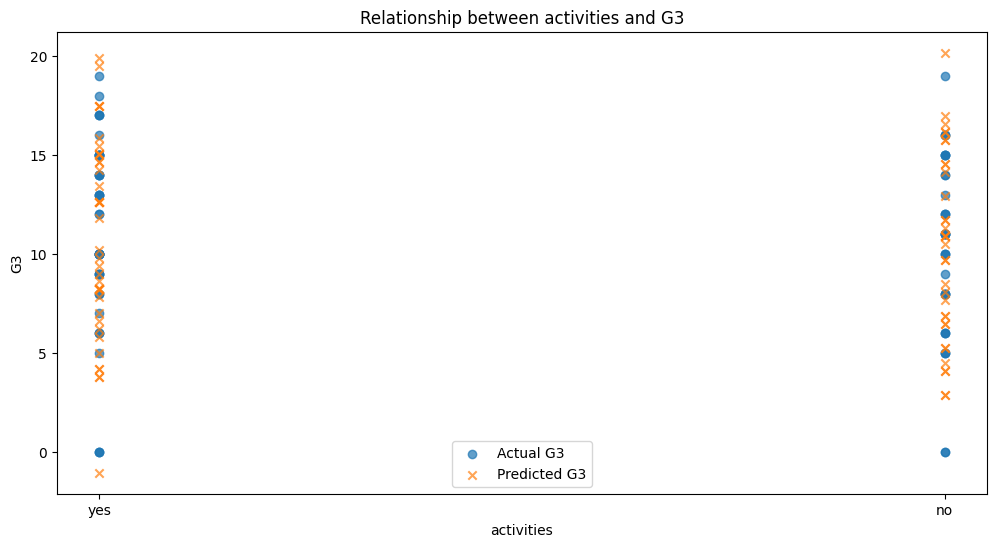

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['activities', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'activities'
data = pd.get_dummies(data, columns=['activities'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'activities_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'activities' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'activities': df.loc[X_test.index, 'activities'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'activities' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['activities'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['activities'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('activities')
plt.ylabel('G3')
plt.title('Relationship between activities and G3')
plt.legend()
plt.show()
